# Linear Regression

### Problem statement:

Roberto owns a cozy pizza hut. Everyday at noon, he checks the number of reseved seats and decides how much pizza dough to prepare for the dinner. Too much dough and it gets wasted; too little, and he runs out of the pizza. In either cases he loses money.

General prediction: More the number of resevations generally mean more pizzas - but other than that, he is not sure what the exact relation is.

Roberto dreams of a progran  that looks at historical data, grasps the relation between the reserved seats and the pizzas, and uses it to forecast tonight's pizza sales from the today reservations.

#### Dataset:
The datset file contains 30 lines of data. each in example, composed of an input variable (the reservations) and a numerical label (the pizzas).

In [26]:
import numpy as np

In [27]:
X, Y = np.loadtxt("pizza.txt", skiprows=1, unpack=True)

In [28]:
#lets check the first few elements of X and y

X[0:5]

array([13.,  2., 14., 23., 13.])

In [29]:
Y[0:5]

array([33., 16., 32., 51., 27.])

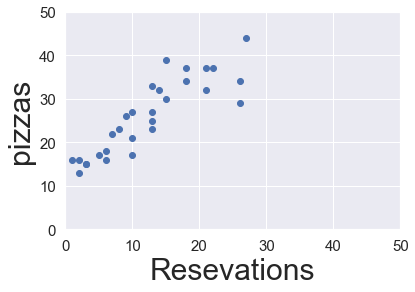

In [30]:
#visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
#activate seaborn
sns.set()
#scaling axes (o to 50)
plt.axis([0, 50, 0, 50])

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel("Resevations", fontsize=30)
plt.ylabel("pizzas",fontsize=30)

X, Y = np.loadtxt("pizza.txt", skiprows=1, unpack = True)
plt.plot(X, Y, "bo")
plt.show()

In [31]:
#predict

def predict(X, w, b):
    return X * w + b

In [32]:
def loss(X, Y, w, b):
    return np.average((predict(X,w,b) - Y)**2)

In [33]:
def train(X, Y, iterations, lr):
    w = b =0
    for i in range(iterations):
        current_loss = loss(X, Y, w, b)
        print("Iteration %4d => Loss: %.6f" %(i, current_loss))
        
        if loss(X, Y, w + lr, b)< current_loss:
            w +=lr
            
        elif loss(X, Y, w-lr, b) < current_loss:
            w -=lr
        elif loss(X, Y, w, b + lr) < current_loss:
            b += lr
        elif loss(X, Y, w, b - lr) < current_loss:
            b -=lr
        else:
            return w,b
    raise Exception("Couldn't converge within %d iterations" % iterations)
    

In [34]:
#train the system

w, b = train(X, Y, iterations=10000, lr=0.01)
print("\nw =%.3f, b=%.3f" %(w, b))


Iteration    0 => Loss: 812.866667
Iteration    1 => Loss: 804.820547
Iteration    2 => Loss: 796.818187
Iteration    3 => Loss: 788.859587
Iteration    4 => Loss: 780.944747
Iteration    5 => Loss: 773.073667
Iteration    6 => Loss: 765.246347
Iteration    7 => Loss: 757.462787
Iteration    8 => Loss: 749.722987
Iteration    9 => Loss: 742.026947
Iteration   10 => Loss: 734.374667
Iteration   11 => Loss: 726.766147
Iteration   12 => Loss: 719.201387
Iteration   13 => Loss: 711.680387
Iteration   14 => Loss: 704.203147
Iteration   15 => Loss: 696.769667
Iteration   16 => Loss: 689.379947
Iteration   17 => Loss: 682.033987
Iteration   18 => Loss: 674.731787
Iteration   19 => Loss: 667.473347
Iteration   20 => Loss: 660.258667
Iteration   21 => Loss: 653.087747
Iteration   22 => Loss: 645.960587
Iteration   23 => Loss: 638.877187
Iteration   24 => Loss: 631.837547
Iteration   25 => Loss: 624.841667
Iteration   26 => Loss: 617.889547
Iteration   27 => Loss: 610.981187
Iteration   28 => Lo

In [35]:
#predict the number of pizzas

print("prediction: x=%d => y=%.2f" % (20, predict(20, w, b)))

prediction: x=20 => y=34.93
